# Hypothesis Testing

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.



### 3. Has the network latency gone up since we switched internet service providers?
    - null hypothesis - Network latency did not go up after switching providers
    - alternative hypothesis - Latency has gone up after switching providers
    - true positive - The network latency increased after switching providers due to the new provider having fiber optic instead of DSL
    - true negative - Network latency didn't increase after switching providers because the new provider's nearest server is much further away than your old provider's
    - type I - Network latency increased but not actually due to switching providers but because they just replaced a faulty connection to your house without you knowing about it
    - type II errors - Network latency didn't increase but it's not because we switched providers but because you decided to use your old wifi router instead of paying to rent one from the new internet service provider who you think is to blame

Note: This would be deteremined via a paired t-test, in which we look at a sample of our data under the previous condition (old internet service provider), and then look at a sample of our data under the current dondition (new internet service provider). A paired t-test is used when we are interested in the difference between two variables for the same subject, and often the two variables are separated by time.

### 2. Is the website redesign any good?
    - null hypothesis - The website is not better after the redesign
    - alternative hypothesis - The website is better after the redesign
    - true positive - The website is highly correlated as being better due to the redesign because it loads and functions faster without the old spaghetti code
    (You can not conclusively say that it's DUE TO THE WEBSITE REDESIGN)
    - true negative - The website is not better after the redesign because it throws error codes rendering it unusable
    - type I - The website is not better after the redesign but it actually is, you just think it looks better but it's slower and customers don't like the change
    - type II errors - The website is actually not better after the redesign but it seems like it is

Note: Think about the number of confounding factors that might drive changes to a websites activity beyond a simple redesign.  If we are launching the new website the day before Black Friday, it is inappropriate to compare that to the previous day.  We would need to compare it to the last website on Black Friday.  Sometimes perfect comparisons are not achievable in the rapidly changing business world, but we must do our best to adequately control for as many factors as we can.  This could be achieved through A?B testing, where we run two versions of the website at the same time and look at...

### 3. Is our television ad driving more sales?

    - null hypothesis - the tv ad is not driving more sales
    - alternative hypothesis - more sales are being driven by the tv ad
    - true positive - The tv ad is the reason why sales are being driven
    - true negative - The tv ad is not helping with driving sales
    - type I - The tv ad is not driving sales but it looks like it is
    - type II errors - the tv ad is helping drive sales but it's actually not.

# T-Test

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import env

from pydataset import data
mpg = data('mpg')


1. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

What are we comparing?
- average time(numeric continuous values) for two different groups (categories)
- One sample or two sample?
- One tailed or two tailed?

Form a hypothesis:

In [2]:
# H_0: Average time to sell at office 1 == average time to sell at office 2
# H_a: Average time to sell at office 1 != average time to sell at office 2


In [3]:
alpha = 0.05

In [4]:
t, p = stats.ttest_ind_from_stats(90, 15, 40, 100, 20, 50, equal_var=False)
t, p

(-2.7091418459143854, 0.00811206270346016)

In [5]:
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")


We reject the null hypothesis


- Load the `mpg` dataset and use it to answer the following questions:


In [6]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


**Hypothesis**

- Is there a *difference* (two tailed) in fuel-efficiency in cars from 2008 vs 1999?
    - $H_{0}$: There is no significant difference in total miles per gallon for cars from 2008 and 1999
    - $H_{a}$: The total miles per gallon is significantly different for cars in 2008 vs 1999

**Significance Level**

$\alpha$ = 0.05

**Verify Assumptions**

- Normal: 
- Independent: 
- Variance: 

In [7]:
alpha = .05

array([[<AxesSubplot:title={'center':'displ'}>,
        <AxesSubplot:title={'center':'year'}>],
       [<AxesSubplot:title={'center':'cyl'}>,
        <AxesSubplot:title={'center':'cty'}>],
       [<AxesSubplot:title={'center':'hwy'}>, <AxesSubplot:>]],
      dtype=object)

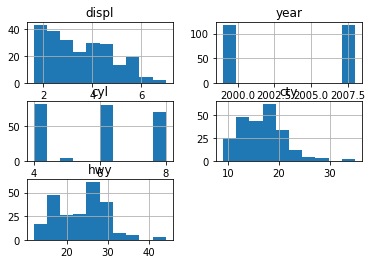

In [8]:
mpg.hist()

In [9]:
mpg_2008_hwy = mpg[mpg.year == 2008].hwy
mpg_1999_hwy = mpg[mpg.year == 1999].hwy

In [10]:
mpg_2008_cty = mpg[mpg.year == 2008].cty
mpg_1999_cty = mpg[mpg.year == 1999].cty

In [11]:
mpg_2008 = (mpg_2008_cty + mpg_2008_hwy)/2
mpg_1999 = (mpg_1999_cty + mpg_1999_hwy)/2

<AxesSubplot:>

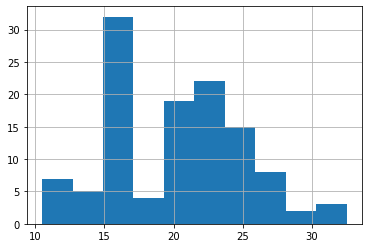

In [12]:
mpg_2008.hist()

<AxesSubplot:>

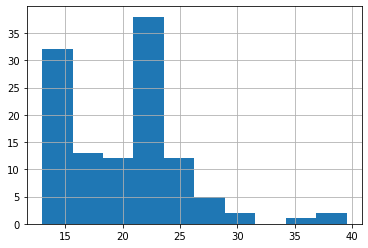

In [13]:
 mpg_1999.hist()

In [14]:
mpg_2008.var()

24.097480106100797

In [15]:
mpg_1999.var()

27.122605363984682

In [16]:
mpg_2008.count(), mpg_1999.count()

(117, 117)

In [17]:
t, p = stats.ttest_ind(mpg_2008, mpg_1999, equal_var= False)

t, p, alpha

(-0.21960177245940962, 0.8263750772060638, 0.05)

It doesn't appear to be a statistically signficant difference with a p-value of 0.8263

**Hypothesis**

- Are compact cars *more* (One sample, one tailed test) fuel-efficient than the average car?
    - $H_{0}$: The fuel-efficiency for compact cars <= mpg for the average car 
    - $H_{a}$: The fuel-efficiency for compact cars > mpg for the average car 

**Significance Level**

$\alpha$ = 0.05

**Verify Assumptions**

- Normal: 
- Independent: 
- Variance: 

In [18]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


In [19]:
mpg['avg_mpg'] = (mpg.hwy + mpg.cty)/2
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [20]:
mpg.rename(columns= {'class': 'type'}, inplace=True)

In [21]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,type,avg_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [22]:
mpg_compact = mpg[mpg.type == 'compact'].avg_mpg
mpg_not_compact = mpg[mpg.type != 'compact'].avg_mpg

In [23]:
mpg_compact.mean()

24.21276595744681

In [24]:
mpg_not_compact.mean()

19.128342245989305

<AxesSubplot:>

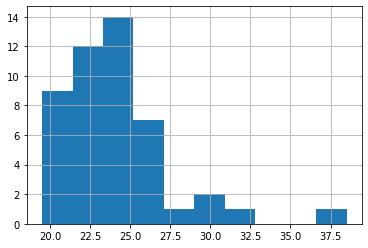

In [25]:
mpg_compact.hist()

<AxesSubplot:>

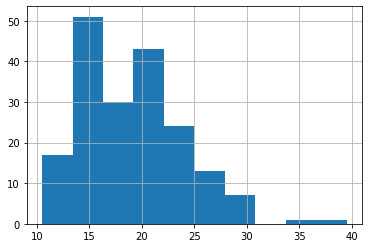

In [26]:
mpg_not_compact.hist()

In [27]:
mpg_compact.var()

12.442876965772433

In [28]:
mpg_not_compact.var()

23.652794548904602

In [29]:
mpg_compact.count()

47

In [30]:
mpg_not_compact.count()

187

In [31]:
t, p = stats.ttest_ind(mpg_compact, mpg_not_compact, equal_var= False)

t, p, alpha

(8.128810422808078, 1.6018060656123074e-12, 0.05)

In [32]:
if (p/2 < alpha) and t > 0:
    print('Reject null')

Reject null




**Hypothesis**

- Do manual cars get better gas mileage than automatic cars?
    - $H_{0}$: Manual cars do not get better gas mileage than automatic cars
    - $H_{a}$: Manual cars do get better gas mileage than automatic cars 

**Significance Level**

$\alpha$ = 0.05

**Verify Assumptions**

- Normal: 
- Independent: 
- Variance: 

In [35]:
mpg_auto = mpg[mpg.trans.str.contains('auto')].avg_mpg
mpg_manual = mpg[mpg.trans.str.contains('manual')].avg_mpg


<AxesSubplot:>

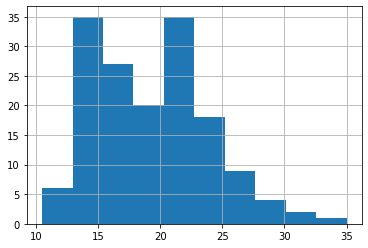

In [36]:
mpg_auto.hist()

<AxesSubplot:>

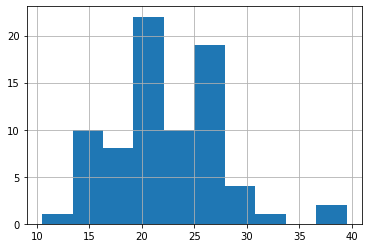

In [38]:
mpg_manual.hist()

In [39]:
mpg_auto.var(), mpg_manual.var()

(21.942777233382337, 26.635167464114826)

In [42]:
stats.levene(mpg_auto, mpg_manual)

LeveneResult(statistic=0.20075824847529639, pvalue=0.6545276355131857)

In [43]:
t, p = stats.ttest_ind(mpg_manual, mpg_auto, equal_var=True)
t, p/2

(4.593437735750014, 3.5771872005728416e-06)

In [44]:
mpg_manual.mean(), mpg_auto.mean()

(22.227272727272727, 19.130573248407643)

In [34]:
mpg_manual = mpg[mpg.trans == 'manual(m5)' or mpg.trans == 'manual(m6)'].avg_mpg
mpg_auto = mpg[mpg.trans == 'auto(l5)' or mpg.trans == 'auto(av)' or mpg.trans == 'auto(s6)' or mpg.trans == 'auto(l4)' or mpg.trans == 'auto(l3)' or mpg.trans ==  'auto(l6)' or mpg.trans == 'auto(s5)' or mpg.trans == 'auto(s4)'].avg_mpg



ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
mpg.trans.unique()

In [ ]:

mpg['trans'].str.contains('manual').any()
mpg['trans'].str.contains('auto').any()

In [ ]:
list(filter(lambda x: 'manual' in x,mpg.trans))

In [ ]:
list(filter(lambda x: 'auto' in x,mpg.trans))

In [ ]:
mpg_manual = (mpg_manual_cty + mpg_manual_hwy)/2
mpg_auto = (mpg_auto_cty + mpg_auto_hwy)/2

In [ ]:
mpg_manual.hist()